In [1]:
import sweetviz
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Data Reading

In [2]:
Data = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","ZeroFilledSellout.csv"))
Data.columns

Index(['SKU', 'Date', 'Sales', 'Version.[Version Name]', 'Time', 'Sell Out PW',
       'WeekNum', 'Year', 'SKU.y'],
      dtype='object')

In [3]:
Data1 = Data[['SKU','Time','Date','Sales']]
Data1

SKU    Time        Date     Sales
0      100000015  W40-19  2019-10-07     0.000
1      100000017  W40-19  2019-10-07     5.000
2      100000019  W40-19  2019-10-07  1003.000
3      100000020  W40-19  2019-10-07   291.000
4      100000030  W40-19  2019-10-07    31.000
...          ...     ...         ...       ...
59503  100187432  W52-20  2020-12-28    14.314
59504  100187433  W52-20  2020-12-28    18.034
59505  100187434  W52-20  2020-12-28     2.152
59506  100187436  W52-20  2020-12-28    67.348
59507  100187846  W52-20  2020-12-28     6.110

[59508 rows x 4 columns]

## Glance View

In [4]:
GlanceView = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","GlanceView.csv"))
GlanceView = GlanceView.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Glance View PW" : "GlanceView"})
GlanceView

Version.[Version Name]    Time        SKU  GlanceView
0         CurrentWorkingView  W01-20  100160486           0
1         CurrentWorkingView  W02-20  100160486           0
2         CurrentWorkingView  W03-20  100160486           0
3         CurrentWorkingView  W04-20  100160486           0
4         CurrentWorkingView  W05-20  100160486           0
...                      ...     ...        ...         ...
34338     CurrentWorkingView  W36-20  100186806         181
34339     CurrentWorkingView  W37-20  100186806         273
34340     CurrentWorkingView  W38-20  100186806         349
34341     CurrentWorkingView  W39-20  100186806         321
34342     CurrentWorkingView  W40-20  100186806         300

[34343 rows x 4 columns]

## Lag Function

In [5]:
def create_lag_variables(df, date_column, grouped_on, shifting_var
                         , month_ascending=True, lag_vars_range = list()):
    """
    Function to create lag-variables    
    Parameters
    ----------
    df : pandas dataframe
        DESCRIPTION. Containing column names like month, banner_id, sku_id and actual_quantity.
    lag_vars_range : list, not optional
        DESCRIPTION. Pass a set of integers which will then generate the individual
        lag variables.

    Returns
    -------
    df : updated pandas dataframe with lag variables
        The passed dataframe is updated with the set of lag-variables 
        as passed to lag_vars_range

    """
    for lag in lag_vars_range:
        df['lag_'+str(lag)] = (df
                               .sort_values(by = date_column, ascending = month_ascending)
                               .groupby(grouped_on)[shifting_var].shift(lag)
                               .fillna(0))
    return df

In [6]:
Data1 = pd.merge(Data1, GlanceView[['SKU','Time','GlanceView']], how='left', on=['SKU','Time'])
Data1

SKU    Time        Date     Sales  GlanceView
0      100000015  W40-19  2019-10-07     0.000         NaN
1      100000017  W40-19  2019-10-07     5.000         NaN
2      100000019  W40-19  2019-10-07  1003.000         NaN
3      100000020  W40-19  2019-10-07   291.000         NaN
4      100000030  W40-19  2019-10-07    31.000         NaN
...          ...     ...         ...       ...         ...
59503  100187432  W52-20  2020-12-28    14.314         NaN
59504  100187433  W52-20  2020-12-28    18.034         NaN
59505  100187434  W52-20  2020-12-28     2.152         NaN
59506  100187436  W52-20  2020-12-28    67.348         NaN
59507  100187846  W52-20  2020-12-28     6.110         NaN

[59508 rows x 5 columns]

In [7]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="GlanceView",month_ascending=True,lag_vars_range=[1,2,3,4])

In [8]:
Data1 = Data1.rename(columns={"lag_1": "GlanceView_Lag1","lag_2" : "GlanceView_Lag2", "lag_3" :"GlanceView_Lag3","lag_4" :"GlanceView_Lag4"})
Data1

SKU    Time        Date     Sales  GlanceView  GlanceView_Lag1  \
0      100000015  W40-19  2019-10-07     0.000         NaN              0.0   
1      100000017  W40-19  2019-10-07     5.000         NaN              0.0   
2      100000019  W40-19  2019-10-07  1003.000         NaN              0.0   
3      100000020  W40-19  2019-10-07   291.000         NaN              0.0   
4      100000030  W40-19  2019-10-07    31.000         NaN              0.0   
...          ...     ...         ...       ...         ...              ...   
59503  100187432  W52-20  2020-12-28    14.314         NaN              0.0   
59504  100187433  W52-20  2020-12-28    18.034         NaN              0.0   
59505  100187434  W52-20  2020-12-28     2.152         NaN              0.0   
59506  100187436  W52-20  2020-12-28    67.348         NaN              0.0   
59507  100187846  W52-20  2020-12-28     6.110         NaN              0.0   

       GlanceView_Lag2  GlanceView_Lag3  GlanceView_Lag4  
0                  0.0              0.0              0.0  
1                  0.0              0.0              0.0  
2                  0.0              0.0              0.0  
3                  0.0              0.0              0.0  
4                  0.0              0.0              0.0  
...                ...              ...              ...  
59503              0.0              0.0              0.0  
59504              0.0              0.0              0.0  
59505              0.0              0.0              0.0  
59506              0.0              0.0              0.0  
59507              0.0              0.0              0.0  

[59508 rows x 9 columns]

In [9]:
pearson = Data1.corr(method='pearson')
pearson

SKU     Sales  GlanceView  GlanceView_Lag1  \
SKU              1.000000 -0.217508   -0.187799        -0.140606   
Sales           -0.217508  1.000000    0.868879         0.631111   
GlanceView      -0.187799  0.868879    1.000000         0.906504   
GlanceView_Lag1 -0.140606  0.631111    0.906504         1.000000   
GlanceView_Lag2 -0.140606  0.603559    0.838603         0.895576   
GlanceView_Lag3 -0.140606  0.597858    0.799177         0.818767   
GlanceView_Lag4 -0.140606  0.593198    0.762434         0.770660   

                 GlanceView_Lag2  GlanceView_Lag3  GlanceView_Lag4  
SKU                    -0.140606        -0.140606        -0.140606  
Sales                   0.603559         0.597858         0.593198  
GlanceView              0.838603         0.799177         0.762434  
GlanceView_Lag1         0.895576         0.818767         0.770660  
GlanceView_Lag2         1.000000         0.895576         0.818767  
GlanceView_Lag3         0.895576         1.000000         0.895576  
GlanceView_Lag4         0.818767         0.895576         1.000000

<AxesSubplot:>

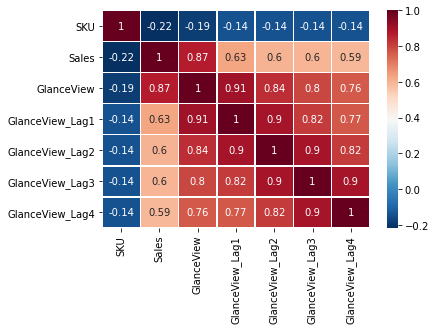

In [10]:
import seaborn as sb
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

## Out of Stock

In [11]:
OOS = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","OutOfStockData.csv"))
OOS = OOS.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Rep OOS PW" : "OOS","Rep OOS% PW" : "OOS%"})
OOS.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'OOS', 'OOS%'], dtype='object')

In [12]:
Data1 = pd.merge(Data1, OOS[['SKU','Time','OOS','OOS%']], how='left', on=['SKU','Time'])
Data1

SKU    Time        Date     Sales  GlanceView  GlanceView_Lag1  \
0      100000015  W40-19  2019-10-07     0.000         NaN              0.0   
1      100000017  W40-19  2019-10-07     5.000         NaN              0.0   
2      100000019  W40-19  2019-10-07  1003.000         NaN              0.0   
3      100000020  W40-19  2019-10-07   291.000         NaN              0.0   
4      100000030  W40-19  2019-10-07    31.000         NaN              0.0   
...          ...     ...         ...       ...         ...              ...   
59503  100187432  W52-20  2020-12-28    14.314         NaN              0.0   
59504  100187433  W52-20  2020-12-28    18.034         NaN              0.0   
59505  100187434  W52-20  2020-12-28     2.152         NaN              0.0   
59506  100187436  W52-20  2020-12-28    67.348         NaN              0.0   
59507  100187846  W52-20  2020-12-28     6.110         NaN              0.0   

       GlanceView_Lag2  GlanceView_Lag3  GlanceView_Lag4  OOS  OOS%  
0                  0.0              0.0              0.0  NaN   NaN  
1                  0.0              0.0              0.0  NaN   NaN  
2                  0.0              0.0              0.0  NaN   NaN  
3                  0.0              0.0              0.0  NaN   NaN  
4                  0.0              0.0              0.0  NaN   NaN  
...                ...              ...              ...  ...   ...  
59503              0.0              0.0              0.0  NaN   NaN  
59504              0.0              0.0              0.0  NaN   NaN  
59505              0.0              0.0              0.0  NaN   NaN  
59506              0.0              0.0              0.0  NaN   NaN  
59507              0.0              0.0              0.0  NaN   NaN  

[59508 rows x 11 columns]

In [13]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="OOS",month_ascending=True,lag_vars_range=[1,2,3,4])

In [14]:
Data1 = Data1.rename(columns={"lag_1": "OOS_Lag1","lag_2" : "OOS_Lag2", "lag_3" :"OOS_Lag3","lag_4" :"OOS_Lag4"})
Data1

SKU    Time        Date     Sales  GlanceView  GlanceView_Lag1  \
0      100000015  W40-19  2019-10-07     0.000         NaN              0.0   
1      100000017  W40-19  2019-10-07     5.000         NaN              0.0   
2      100000019  W40-19  2019-10-07  1003.000         NaN              0.0   
3      100000020  W40-19  2019-10-07   291.000         NaN              0.0   
4      100000030  W40-19  2019-10-07    31.000         NaN              0.0   
...          ...     ...         ...       ...         ...              ...   
59503  100187432  W52-20  2020-12-28    14.314         NaN              0.0   
59504  100187433  W52-20  2020-12-28    18.034         NaN              0.0   
59505  100187434  W52-20  2020-12-28     2.152         NaN              0.0   
59506  100187436  W52-20  2020-12-28    67.348         NaN              0.0   
59507  100187846  W52-20  2020-12-28     6.110         NaN              0.0   

       GlanceView_Lag2  GlanceView_Lag3  GlanceView_Lag4  OOS  OOS%  OOS_Lag1  \
0                  0.0              0.0              0.0  NaN   NaN       0.0   
1                  0.0              0.0              0.0  NaN   NaN       0.0   
2                  0.0              0.0              0.0  NaN   NaN       0.0   
3                  0.0              0.0              0.0  NaN   NaN       0.0   
4                  0.0              0.0              0.0  NaN   NaN       0.0   
...                ...              ...              ...  ...   ...       ...   
59503              0.0              0.0              0.0  NaN   NaN       0.0   
59504              0.0              0.0              0.0  NaN   NaN       0.0   
59505              0.0              0.0              0.0  NaN   NaN       0.0   
59506              0.0              0.0              0.0  NaN   NaN       0.0   
59507              0.0              0.0              0.0  NaN   NaN       0.0   

       OOS_Lag2  OOS_Lag3  OOS_Lag4  
0           0.0       0.0       0.0  
1           0.0       0.0       0.0  
2           0.0       0.0       0.0  
3           0.0       0.0       0.0  
4           0.0       0.0       0.0  
...         ...       ...       ...  
59503       0.0       0.0       0.0  
59504       0.0       0.0       0.0  
59505       0.0       0.0       0.0  
59506       0.0       0.0       0.0  
59507       0.0       0.0       0.0  

[59508 rows x 15 columns]

In [15]:
pearson = Data1.corr(method='pearson')
pearson

SKU     Sales  GlanceView  GlanceView_Lag1  \
SKU              1.000000 -0.217508   -0.187799        -0.140606   
Sales           -0.217508  1.000000    0.868879         0.631111   
GlanceView      -0.187799  0.868879    1.000000         0.906504   
GlanceView_Lag1 -0.140606  0.631111    0.906504         1.000000   
GlanceView_Lag2 -0.140606  0.603559    0.838603         0.895576   
GlanceView_Lag3 -0.140606  0.597858    0.799177         0.818767   
GlanceView_Lag4 -0.140606  0.593198    0.762434         0.770660   
OOS             -0.154880  0.595585    0.575695         0.558660   
OOS%            -0.045117 -0.064297   -0.068272        -0.034256   
OOS_Lag1        -0.110798  0.448493    0.540161         0.591558   
OOS_Lag2        -0.110798  0.449718    0.519965         0.537120   
OOS_Lag3        -0.110798  0.461656    0.502460         0.501892   
OOS_Lag4        -0.110798  0.480687    0.483381         0.475634   

                 GlanceView_Lag2  GlanceView_Lag3  GlanceView_Lag4       OOS  \
SKU                    -0.140606        -0.140606        -0.140606 -0.154880   
Sales                   0.603559         0.597858         0.593198  0.595585   
GlanceView              0.838603         0.799177         0.762434  0.575695   
GlanceView_Lag1         0.895576         0.818767         0.770660  0.558660   
GlanceView_Lag2         1.000000         0.895576         0.818767  0.550340   
GlanceView_Lag3         0.895576         1.000000         0.895576  0.531088   
GlanceView_Lag4         0.818767         0.895576         1.000000  0.533838   
OOS                     0.550340         0.531088         0.533838  1.000000   
OOS%                   -0.013970        -0.002121         0.005579  0.136717   
OOS_Lag1                0.564601         0.545191         0.519196  0.690126   
OOS_Lag2                0.591558         0.564601         0.545191  0.610002   
OOS_Lag3                0.537120         0.591558         0.564601  0.562506   
OOS_Lag4                0.501892         0.537120         0.591558  0.561994   

                     OOS%  OOS_Lag1  OOS_Lag2  OOS_Lag3  OOS_Lag4  
SKU             -0.045117 -0.110798 -0.110798 -0.110798 -0.110798  
Sales           -0.064297  0.448493  0.449718  0.461656  0.480687  
GlanceView      -0.068272  0.540161  0.519965  0.502460  0.483381  
GlanceView_Lag1 -0.034256  0.591558  0.537120  0.501892  0.475634  
GlanceView_Lag2 -0.013970  0.564601  0.591558  0.537120  0.501892  
GlanceView_Lag3 -0.002121  0.545191  0.564601  0.591558  0.537120  
GlanceView_Lag4  0.005579  0.519196  0.545191  0.564601  0.591558  
OOS              0.136717  0.690126  0.610002  0.562506  0.561994  
OOS%             1.000000  0.102741  0.089948  0.075517  0.065980  
OOS_Lag1         0.102741  1.000000  0.674720  0.582211  0.526620  
OOS_Lag2         0.089948  0.674720  1.000000  0.674720  0.582211  
OOS_Lag3         0.075517  0.582211  0.674720  1.000000  0.674720  
OOS_Lag4         0.065980  0.526620  0.582211  0.674720  1.000000

<AxesSubplot:>

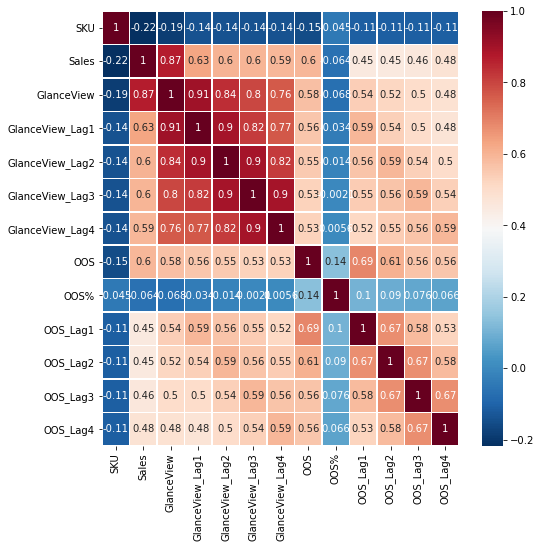

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

In [17]:
# Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="OOS%",month_ascending=True,lag_vars_range=[1,2,3,4])
# Data1.columns

In [18]:
# Data1 = Data1.rename(columns={"lag_1": "OOS%_Lag1","lag_2" : "OOS%_Lag2", "lag_3" :"OOS%_Lag3","lag_4" :"OOS%_Lag4"})
# Data1.columns

# LBB Price

In [19]:
LBB = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","LBB_Price_Data.csv"))
LBB = LBB.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","LBB Price" : "LBB_Price"})
LBB.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'LBB_Price'], dtype='object')

In [20]:
Data1 = pd.merge(Data1, LBB[['SKU','Time','LBB_Price']], how='left', on=['SKU','Time'])
Data1

SKU    Time        Date     Sales  GlanceView  GlanceView_Lag1  \
0      100000015  W40-19  2019-10-07     0.000         NaN              0.0   
1      100000017  W40-19  2019-10-07     5.000         NaN              0.0   
2      100000019  W40-19  2019-10-07  1003.000         NaN              0.0   
3      100000020  W40-19  2019-10-07   291.000         NaN              0.0   
4      100000030  W40-19  2019-10-07    31.000         NaN              0.0   
...          ...     ...         ...       ...         ...              ...   
59503  100187432  W52-20  2020-12-28    14.314         NaN              0.0   
59504  100187433  W52-20  2020-12-28    18.034         NaN              0.0   
59505  100187434  W52-20  2020-12-28     2.152         NaN              0.0   
59506  100187436  W52-20  2020-12-28    67.348         NaN              0.0   
59507  100187846  W52-20  2020-12-28     6.110         NaN              0.0   

       GlanceView_Lag2  GlanceView_Lag3  GlanceView_Lag4  OOS  OOS%  OOS_Lag1  \
0                  0.0              0.0              0.0  NaN   NaN       0.0   
1                  0.0              0.0              0.0  NaN   NaN       0.0   
2                  0.0              0.0              0.0  NaN   NaN       0.0   
3                  0.0              0.0              0.0  NaN   NaN       0.0   
4                  0.0              0.0              0.0  NaN   NaN       0.0   
...                ...              ...              ...  ...   ...       ...   
59503              0.0              0.0              0.0  NaN   NaN       0.0   
59504              0.0              0.0              0.0  NaN   NaN       0.0   
59505              0.0              0.0              0.0  NaN   NaN       0.0   
59506              0.0              0.0              0.0  NaN   NaN       0.0   
59507              0.0              0.0              0.0  NaN   NaN       0.0   

       OOS_Lag2  OOS_Lag3  OOS_Lag4  LBB_Price  
0           0.0       0.0       0.0   0.000000  
1           0.0       0.0       0.0   0.800000  
2           0.0       0.0       0.0   0.000000  
3           0.0       0.0       0.0   0.001835  
4           0.0       0.0       0.0   0.000000  
...         ...       ...       ...        ...  
59503       0.0       0.0       0.0        NaN  
59504       0.0       0.0       0.0        NaN  
59505       0.0       0.0       0.0        NaN  
59506       0.0       0.0       0.0        NaN  
59507       0.0       0.0       0.0        NaN  

[59508 rows x 16 columns]

In [21]:
# import seaborn as sb
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(12,12))
# sb.heatmap(pearson, 
#             xticklabels=pearson.columns,
#             yticklabels=pearson.columns,
#             cmap='RdBu_r',
#             annot=True,linewidths=0.5, ax=ax)

In [22]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="LBB_Price",month_ascending=True,lag_vars_range=[1,2,3,4])


In [23]:
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceView_Lag1',
       'GlanceView_Lag2', 'GlanceView_Lag3', 'GlanceView_Lag4', 'OOS', 'OOS%',
       'OOS_Lag1', 'OOS_Lag2', 'OOS_Lag3', 'OOS_Lag4', 'LBB_Price', 'lag_1',
       'lag_2', 'lag_3', 'lag_4'],
      dtype='object')

In [24]:
Data1 = Data1.rename(columns={"lag_1": "LBBP_Lag1","lag_2" : "LBBP_Lag2", "lag_3" :"LBBP_Lag3","lag_4" :"LBBP_Lag4"})


In [25]:
pearson = Data1.corr(method='pearson')
pearson

SKU     Sales  GlanceView  GlanceView_Lag1  \
SKU              1.000000 -0.217508   -0.187799        -0.140606   
Sales           -0.217508  1.000000    0.868879         0.631111   
GlanceView      -0.187799  0.868879    1.000000         0.906504   
GlanceView_Lag1 -0.140606  0.631111    0.906504         1.000000   
GlanceView_Lag2 -0.140606  0.603559    0.838603         0.895576   
GlanceView_Lag3 -0.140606  0.597858    0.799177         0.818767   
GlanceView_Lag4 -0.140606  0.593198    0.762434         0.770660   
OOS             -0.154880  0.595585    0.575695         0.558660   
OOS%            -0.045117 -0.064297   -0.068272        -0.034256   
OOS_Lag1        -0.110798  0.448493    0.540161         0.591558   
OOS_Lag2        -0.110798  0.449718    0.519965         0.537120   
OOS_Lag3        -0.110798  0.461656    0.502460         0.501892   
OOS_Lag4        -0.110798  0.480687    0.483381         0.475634   
LBB_Price       -0.072761 -0.063174   -0.066172        -0.059809   
LBBP_Lag1       -0.070160 -0.050638   -0.061955        -0.039774   
LBBP_Lag2       -0.070160 -0.047547   -0.058672        -0.036286   
LBBP_Lag3       -0.070160 -0.044807   -0.056641        -0.033711   
LBBP_Lag4       -0.070160 -0.042768   -0.054740        -0.031416   

                 GlanceView_Lag2  GlanceView_Lag3  GlanceView_Lag4       OOS  \
SKU                    -0.140606        -0.140606        -0.140606 -0.154880   
Sales                   0.603559         0.597858         0.593198  0.595585   
GlanceView              0.838603         0.799177         0.762434  0.575695   
GlanceView_Lag1         0.895576         0.818767         0.770660  0.558660   
GlanceView_Lag2         1.000000         0.895576         0.818767  0.550340   
GlanceView_Lag3         0.895576         1.000000         0.895576  0.531088   
GlanceView_Lag4         0.818767         0.895576         1.000000  0.533838   
OOS                     0.550340         0.531088         0.533838  1.000000   
OOS%                   -0.013970        -0.002121         0.005579  0.136717   
OOS_Lag1                0.564601         0.545191         0.519196  0.690126   
OOS_Lag2                0.591558         0.564601         0.545191  0.610002   
OOS_Lag3                0.537120         0.591558         0.564601  0.562506   
OOS_Lag4                0.501892         0.537120         0.591558  0.561994   
LBB_Price              -0.057551        -0.055683        -0.054566 -0.042691   
LBBP_Lag1              -0.038761        -0.038399        -0.038482 -0.037872   
LBBP_Lag2              -0.039774        -0.038761        -0.038399 -0.035238   
LBBP_Lag3              -0.036286        -0.039774        -0.038761 -0.034912   
LBBP_Lag4              -0.033711        -0.036286        -0.039774 -0.034312   

                     OOS%  OOS_Lag1  OOS_Lag2  OOS_Lag3  OOS_Lag4  LBB_Price  \
SKU             -0.045117 -0.110798 -0.110798 -0.110798 -0.110798  -0.072761   
Sales           -0.064297  0.448493  0.449718  0.461656  0.480687  -0.063174   
GlanceView      -0.068272  0.540161  0.519965  0.502460  0.483381  -0.066172   
GlanceView_Lag1 -0.034256  0.591558  0.537120  0.501892  0.475634  -0.059809   
GlanceView_Lag2 -0.013970  0.564601  0.591558  0.537120  0.501892  -0.057551   
GlanceView_Lag3 -0.002121  0.545191  0.564601  0.591558  0.537120  -0.055683   
GlanceView_Lag4  0.005579  0.519196  0.545191  0.564601  0.591558  -0.054566   
OOS              0.136717  0.690126  0.610002  0.562506  0.561994  -0.042691   
OOS%             1.000000  0.102741  0.089948  0.075517  0.065980   0.000731   
OOS_Lag1         0.102741  1.000000  0.674720  0.582211  0.526620  -0.030637   
OOS_Lag2         0.089948  0.674720  1.000000  0.674720  0.582211  -0.028662   
OOS_Lag3         0.075517  0.582211  0.674720  1.000000  0.674720  -0.024956   
OOS_Lag4         0.065980  0.526620  0.582211  0.674720  1.000000  -0.019928   
LBB_Price        0.000731 -0.030637 -0.028662 -0.024956 -0.019928   1.000000   
LBBP_Lag

<AxesSubplot:>

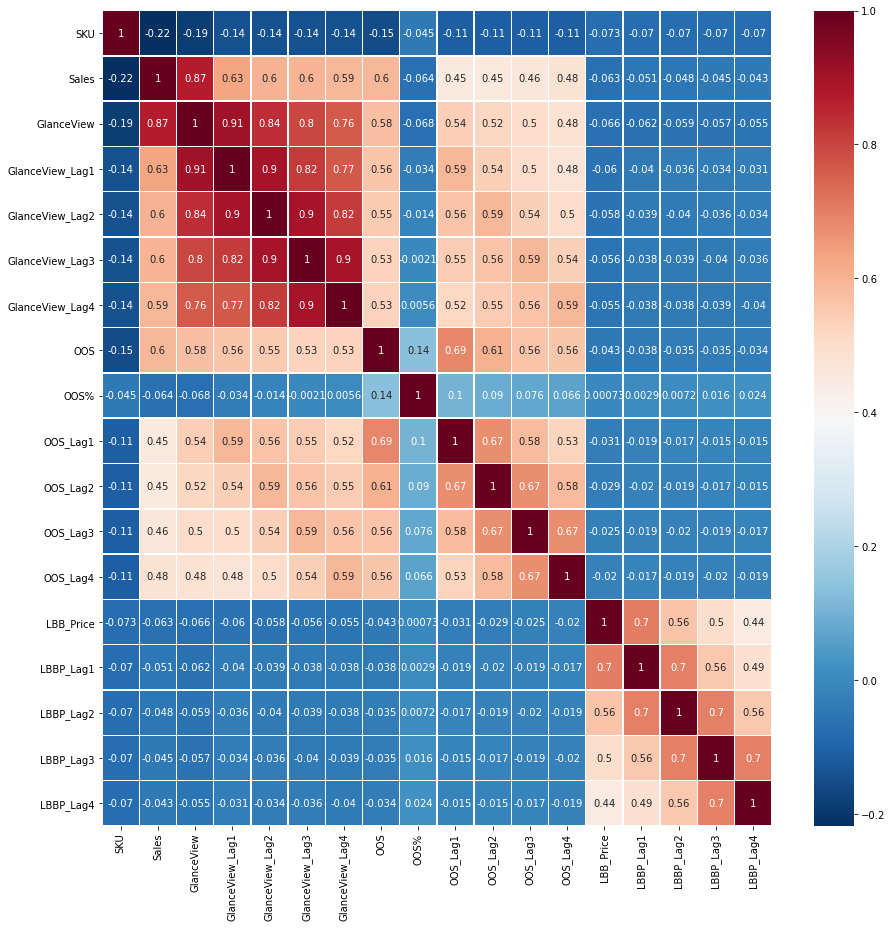

In [26]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

## For ILIActivity (Seasonal Flu)

# Conversion Percentage Data

In [27]:
ConvPerc = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","ConversionPercentageData.csv"))
ConvPerc = ConvPerc.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Conversion% PW" : "ConvPerc"})
ConvPerc.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'ConvPerc'], dtype='object')

In [28]:
Data1 = pd.merge(Data1, ConvPerc[['SKU','Time','ConvPerc']], how='left', on=['SKU','Time'])
Data1

SKU    Time        Date     Sales  GlanceView  GlanceView_Lag1  \
0      100000015  W40-19  2019-10-07     0.000         NaN              0.0   
1      100000017  W40-19  2019-10-07     5.000         NaN              0.0   
2      100000019  W40-19  2019-10-07  1003.000         NaN              0.0   
3      100000020  W40-19  2019-10-07   291.000         NaN              0.0   
4      100000030  W40-19  2019-10-07    31.000         NaN              0.0   
...          ...     ...         ...       ...         ...              ...   
59503  100187432  W52-20  2020-12-28    14.314         NaN              0.0   
59504  100187433  W52-20  2020-12-28    18.034         NaN              0.0   
59505  100187434  W52-20  2020-12-28     2.152         NaN              0.0   
59506  100187436  W52-20  2020-12-28    67.348         NaN              0.0   
59507  100187846  W52-20  2020-12-28     6.110         NaN              0.0   

       GlanceView_Lag2  GlanceView_Lag3  GlanceView_Lag4  OOS  ...  OOS_Lag1  \
0                  0.0              0.0              0.0  NaN  ...       0.0   
1                  0.0              0.0              0.0  NaN  ...       0.0   
2                  0.0              0.0              0.0  NaN  ...       0.0   
3                  0.0              0.0              0.0  NaN  ...       0.0   
4                  0.0              0.0              0.0  NaN  ...       0.0   
...                ...              ...              ...  ...  ...       ...   
59503              0.0              0.0              0.0  NaN  ...       0.0   
59504              0.0              0.0              0.0  NaN  ...       0.0   
59505              0.0              0.0              0.0  NaN  ...       0.0   
59506              0.0              0.0              0.0  NaN  ...       0.0   
59507              0.0              0.0              0.0  NaN  ...       0.0   

       OOS_Lag2  OOS_Lag3  OOS_Lag4  LBB_Price  LBBP_Lag1  LBBP_Lag2  \
0           0.0       0.0       0.0   0.000000        0.0        0.0   
1           0.0       0.0       0.0   0.800000        0.0        0.0   
2           0.0       0.0       0.0   0.000000        0.0        0.0   
3           0.0       0.0       0.0   0.001835        0.0        0.0   
4           0.0       0.0       0.0   0.000000        0.0        0.0   
...         ...       ...       ...        ...        ...        ...   
59503       0.0       0.0       0.0        NaN        0.0        0.0   
59504       0.0       0.0       0.0        NaN        0.0        0.0   
59505       0.0       0.0       0.0        NaN        0.0        0.0   
59506       0.0       0.0       0.0        NaN        0.0        0.0   
59507       0.0       0.0       0.0        NaN        0.0        0.0   

       LBBP_Lag3  LBBP_Lag4  ConvPerc  
0            0.0        0.0       NaN  
1            0.0        0.0       NaN  
2            0.0        0.0       NaN  
3            0.0        0.0       NaN  
4            0.0        0.0       NaN  
...          ...        ...       ...  
59503        0.0        0.0  0.250000  
59504        0.0        0.0  0.207921  
59505        0.0        0.0  0.000000  
59506        0.0        0.0  0.322581  
59507        0.0        0.0  0.331647  

[59508 rows x 21 columns]

In [29]:
pearson = Data1.corr(method='pearson')
pearson

SKU     Sales  GlanceView  GlanceView_Lag1  \
SKU              1.000000 -0.217508   -0.187799        -0.140606   
Sales           -0.217508  1.000000    0.868879         0.631111   
GlanceView      -0.187799  0.868879    1.000000         0.906504   
GlanceView_Lag1 -0.140606  0.631111    0.906504         1.000000   
GlanceView_Lag2 -0.140606  0.603559    0.838603         0.895576   
GlanceView_Lag3 -0.140606  0.597858    0.799177         0.818767   
GlanceView_Lag4 -0.140606  0.593198    0.762434         0.770660   
OOS             -0.154880  0.595585    0.575695         0.558660   
OOS%            -0.045117 -0.064297   -0.068272        -0.034256   
OOS_Lag1        -0.110798  0.448493    0.540161         0.591558   
OOS_Lag2        -0.110798  0.449718    0.519965         0.537120   
OOS_Lag3        -0.110798  0.461656    0.502460         0.501892   
OOS_Lag4        -0.110798  0.480687    0.483381         0.475634   
LBB_Price       -0.072761 -0.063174   -0.066172        -0.059809   
LBBP_Lag1       -0.070160 -0.050638   -0.061955        -0.039774   
LBBP_Lag2       -0.070160 -0.047547   -0.058672        -0.036286   
LBBP_Lag3       -0.070160 -0.044807   -0.056641        -0.033711   
LBBP_Lag4       -0.070160 -0.042768   -0.054740        -0.031416   
ConvPerc        -0.023956  0.011541   -0.003210        -0.003443   

                 GlanceView_Lag2  GlanceView_Lag3  GlanceView_Lag4       OOS  \
SKU                    -0.140606        -0.140606        -0.140606 -0.154880   
Sales                   0.603559         0.597858         0.593198  0.595585   
GlanceView              0.838603         0.799177         0.762434  0.575695   
GlanceView_Lag1         0.895576         0.818767         0.770660  0.558660   
GlanceView_Lag2         1.000000         0.895576         0.818767  0.550340   
GlanceView_Lag3         0.895576         1.000000         0.895576  0.531088   
GlanceView_Lag4         0.818767         0.895576         1.000000  0.533838   
OOS                     0.550340         0.531088         0.533838  1.000000   
OOS%                   -0.013970        -0.002121         0.005579  0.136717   
OOS_Lag1                0.564601         0.545191         0.519196  0.690126   
OOS_Lag2                0.591558         0.564601         0.545191  0.610002   
OOS_Lag3                0.537120         0.591558         0.564601  0.562506   
OOS_Lag4                0.501892         0.537120         0.591558  0.561994   
LBB_Price              -0.057551        -0.055683        -0.054566 -0.042691   
LBBP_Lag1              -0.038761        -0.038399        -0.038482 -0.037872   
LBBP_Lag2              -0.039774        -0.038761        -0.038399 -0.035238   
LBBP_Lag3              -0.036286        -0.039774        -0.038761 -0.034912   
LBBP_Lag4              -0.033711        -0.036286        -0.039774 -0.034312   
ConvPerc               -0.002371        -0.000634         0.000318  0.039457   

                     OOS%  OOS_Lag1  OOS_Lag2  OOS_Lag3  OOS_Lag4  LBB_Price  \
SKU             -0.045117 -0.110798 -0.110798 -0.110798 -0.110798  -0.072761   
Sales           -0.064297  0.448493  0.449718  0.461656  0.480687  -0.063174   
GlanceView      -0.068272  0.540161  0.519965  0.502460  0.483381  -0.066172   
GlanceView_Lag1 -0.034256  0.591558  0.537120  0.501892  0.475634  -0.059809   
GlanceView_Lag2 -0.013970  0.564601  0.591558  0.537120  0.501892  -0.057551   
GlanceView_Lag3 -0.002121  0.545191  0.564601  0.591558  0.537120  -0.055683   
GlanceView_Lag4  0.005579  0.519196  0.545191  0.564601  0.591558  -0.054566   
OOS              0.136717  0.690126  0.610002  0.562506  0.561994  -0.042691   
OOS%             1.000000  0.102741  0.089948  0.075517  0.065980   0.000731   
OOS_Lag1         0.102741  1.000000  0.674720  0.582211  0.526620  -0.030637   
OOS_Lag2         0.089948  0.674720  1.000000  0.674720  0.582211  -0.028662   
OOS_Lag3         0.075517  0.582211  0.674720  1.000000  0.674720  -0.024956   
OOS_Lag4         0.0

<AxesSubplot:>

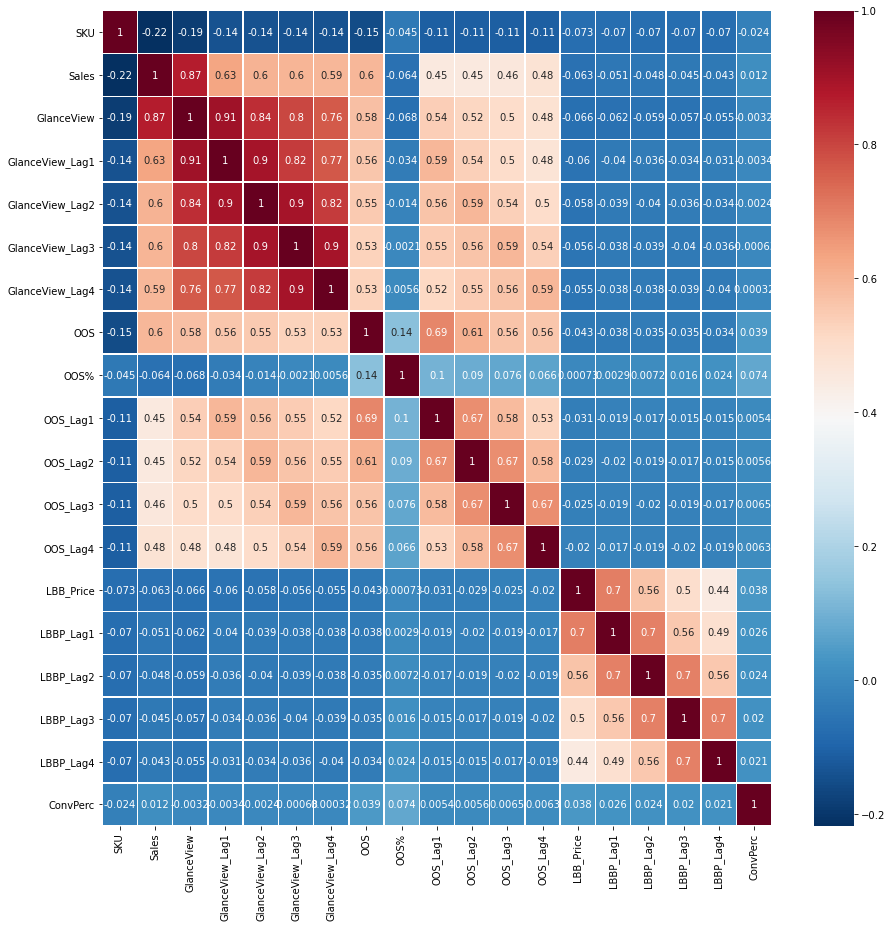

In [30]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

# Channel Inventory

In [31]:
ChInv = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","ChInvData.csv"))
ChInv = ChInv.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Ch INV PW" : "ChInv"})
ChInv.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'ChInv'], dtype='object')

In [32]:
Data1 = pd.merge(Data1, ChInv[['SKU','Time','ChInv']], how='left', on=['SKU','Time'])
Data1

SKU    Time        Date     Sales  GlanceView  GlanceView_Lag1  \
0      100000015  W40-19  2019-10-07     0.000         NaN              0.0   
1      100000017  W40-19  2019-10-07     5.000         NaN              0.0   
2      100000019  W40-19  2019-10-07  1003.000         NaN              0.0   
3      100000020  W40-19  2019-10-07   291.000         NaN              0.0   
4      100000030  W40-19  2019-10-07    31.000         NaN              0.0   
...          ...     ...         ...       ...         ...              ...   
59503  100187432  W52-20  2020-12-28    14.314         NaN              0.0   
59504  100187433  W52-20  2020-12-28    18.034         NaN              0.0   
59505  100187434  W52-20  2020-12-28     2.152         NaN              0.0   
59506  100187436  W52-20  2020-12-28    67.348         NaN              0.0   
59507  100187846  W52-20  2020-12-28     6.110         NaN              0.0   

       GlanceView_Lag2  GlanceView_Lag3  GlanceView_Lag4  OOS  ...  OOS_Lag2  \
0                  0.0              0.0              0.0  NaN  ...       0.0   
1                  0.0              0.0              0.0  NaN  ...       0.0   
2                  0.0              0.0              0.0  NaN  ...       0.0   
3                  0.0              0.0              0.0  NaN  ...       0.0   
4                  0.0              0.0              0.0  NaN  ...       0.0   
...                ...              ...              ...  ...  ...       ...   
59503              0.0              0.0              0.0  NaN  ...       0.0   
59504              0.0              0.0              0.0  NaN  ...       0.0   
59505              0.0              0.0              0.0  NaN  ...       0.0   
59506              0.0              0.0              0.0  NaN  ...       0.0   
59507              0.0              0.0              0.0  NaN  ...       0.0   

       OOS_Lag3  OOS_Lag4  LBB_Price  LBBP_Lag1  LBBP_Lag2  LBBP_Lag3  \
0           0.0       0.0   0.000000        0.0        0.0        0.0   
1           0.0       0.0   0.800000        0.0        0.0        0.0   
2           0.0       0.0   0.000000        0.0        0.0        0.0   
3           0.0       0.0   0.001835        0.0        0.0        0.0   
4           0.0       0.0   0.000000        0.0        0.0        0.0   
...         ...       ...        ...        ...        ...        ...   
59503       0.0       0.0        NaN        0.0        0.0        0.0   
59504       0.0       0.0        NaN        0.0        0.0        0.0   
59505       0.0       0.0        NaN        0.0        0.0        0.0   
59506       0.0       0.0        NaN        0.0        0.0        0.0   
59507       0.0       0.0        NaN        0.0        0.0        0.0   

       LBBP_Lag4  ConvPerc    ChInv  
0            0.0       NaN      0.0  
1            0.0       NaN    414.0  
2            0.0       NaN   5350.0  
3            0.0       NaN   3786.0  
4            0.0       NaN    194.0  
...          ...       ...      ...  
59503        0.0  0.250000     57.0  
59504        0.0  0.207921    117.0  
59505        0.0  0.000000     78.0  
59506        0.0  0.322581    256.0  
59507        0.0  0.331647  15354.0  

[59508 rows x 22 columns]

In [33]:
pearson = Data1.corr(method='pearson')
pearson

SKU     Sales  GlanceView  GlanceView_Lag1  \
SKU              1.000000 -0.217508   -0.187799        -0.140606   
Sales           -0.217508  1.000000    0.868879         0.631111   
GlanceView      -0.187799  0.868879    1.000000         0.906504   
GlanceView_Lag1 -0.140606  0.631111    0.906504         1.000000   
GlanceView_Lag2 -0.140606  0.603559    0.838603         0.895576   
GlanceView_Lag3 -0.140606  0.597858    0.799177         0.818767   
GlanceView_Lag4 -0.140606  0.593198    0.762434         0.770660   
OOS             -0.154880  0.595585    0.575695         0.558660   
OOS%            -0.045117 -0.064297   -0.068272        -0.034256   
OOS_Lag1        -0.110798  0.448493    0.540161         0.591558   
OOS_Lag2        -0.110798  0.449718    0.519965         0.537120   
OOS_Lag3        -0.110798  0.461656    0.502460         0.501892   
OOS_Lag4        -0.110798  0.480687    0.483381         0.475634   
LBB_Price       -0.072761 -0.063174   -0.066172        -0.059809   
LBBP_Lag1       -0.070160 -0.050638   -0.061955        -0.039774   
LBBP_Lag2       -0.070160 -0.047547   -0.058672        -0.036286   
LBBP_Lag3       -0.070160 -0.044807   -0.056641        -0.033711   
LBBP_Lag4       -0.070160 -0.042768   -0.054740        -0.031416   
ConvPerc        -0.023956  0.011541   -0.003210        -0.003443   
ChInv           -0.226288  0.707493    0.545748         0.375717   

                 GlanceView_Lag2  GlanceView_Lag3  GlanceView_Lag4       OOS  \
SKU                    -0.140606        -0.140606        -0.140606 -0.154880   
Sales                   0.603559         0.597858         0.593198  0.595585   
GlanceView              0.838603         0.799177         0.762434  0.575695   
GlanceView_Lag1         0.895576         0.818767         0.770660  0.558660   
GlanceView_Lag2         1.000000         0.895576         0.818767  0.550340   
GlanceView_Lag3         0.895576         1.000000         0.895576  0.531088   
GlanceView_Lag4         0.818767         0.895576         1.000000  0.533838   
OOS                     0.550340         0.531088         0.533838  1.000000   
OOS%                   -0.013970        -0.002121         0.005579  0.136717   
OOS_Lag1                0.564601         0.545191         0.519196  0.690126   
OOS_Lag2                0.591558         0.564601         0.545191  0.610002   
OOS_Lag3                0.537120         0.591558         0.564601  0.562506   
OOS_Lag4                0.501892         0.537120         0.591558  0.561994   
LBB_Price              -0.057551        -0.055683        -0.054566 -0.042691   
LBBP_Lag1              -0.038761        -0.038399        -0.038482 -0.037872   
LBBP_Lag2              -0.039774        -0.038761        -0.038399 -0.035238   
LBBP_Lag3              -0.036286        -0.039774        -0.038761 -0.034912   
LBBP_Lag4              -0.033711        -0.036286        -0.039774 -0.034312   
ConvPerc               -0.002371        -0.000634         0.000318  0.039457   
ChInv                   0.393176         0.417236         0.440393  0.364325   

                     OOS%  OOS_Lag1  OOS_Lag2  OOS_Lag3  OOS_Lag4  LBB_Price  \
SKU             -0.045117 -0.110798 -0.110798 -0.110798 -0.110798  -0.072761   
Sales           -0.064297  0.448493  0.449718  0.461656  0.480687  -0.063174   
GlanceView      -0.068272  0.540161  0.519965  0.502460  0.483381  -0.066172   
GlanceView_Lag1 -0.034256  0.591558  0.537120  0.501892  0.475634  -0.059809   
GlanceView_Lag2 -0.013970  0.564601  0.591558  0.537120  0.501892  -0.057551   
GlanceView_Lag3 -0.002121  0.545191  0.564601  0.591558  0.537120  -0.055683   
GlanceView_Lag4  0.005579  0.519196  0.545191  0.564601  0.591558  -0.054566   
OOS              0.136717  0.690126  0.610002  0.562506  0.561994  -0.042691   
OOS%             1.000000  0.102741  0.089948  0.075517  0.065980   0.000731   
OOS_Lag1         0.102741  1.000000  0.674720  0.582211  0.526620  -0.030637   
OOS_Lag2         0.089948  0.674

<AxesSubplot:>

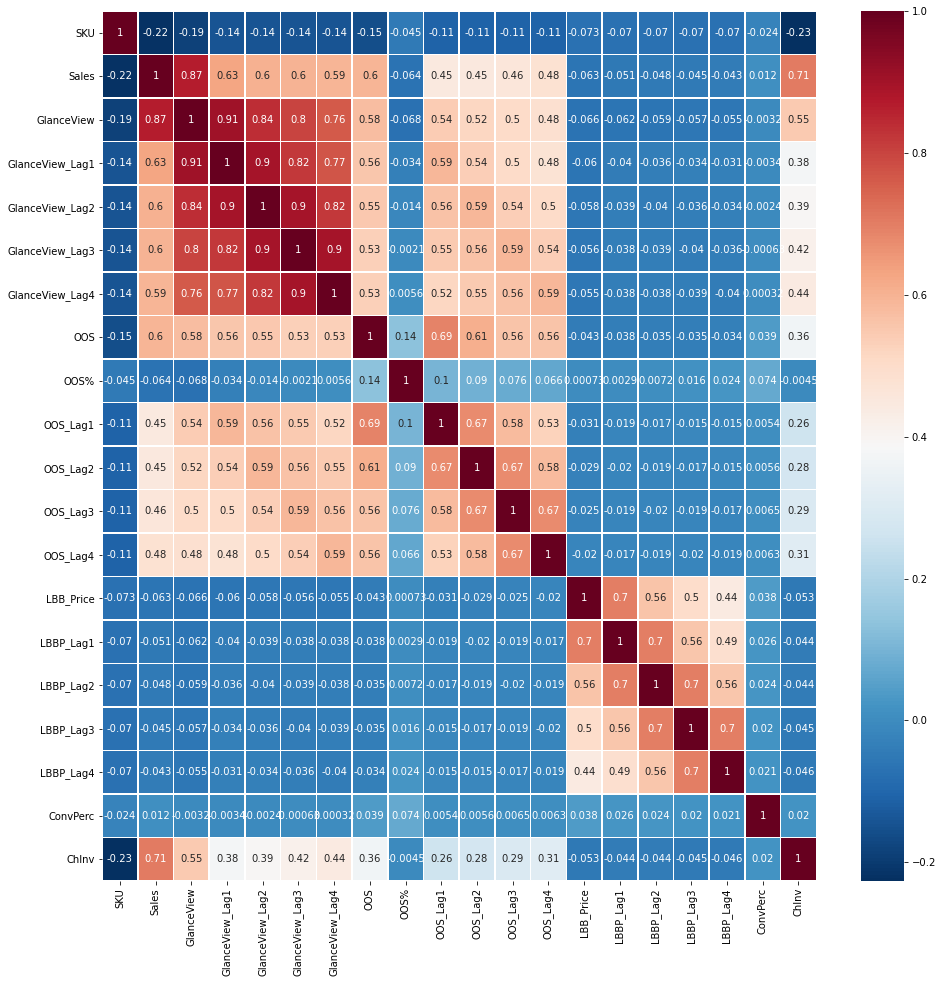

In [34]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,16))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

In [35]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="ChInv",month_ascending=True,lag_vars_range=[1,2,3,4])


In [36]:
Data1 = Data1.rename(columns={"lag_1": "ChInv_Lag1","lag_2" : "ChInv_Lag2", "lag_3" :"ChInv_Lag3","lag_4" :"ChInv_Lag4"})


In [37]:
pearson = Data1.corr(method='pearson')


<AxesSubplot:>

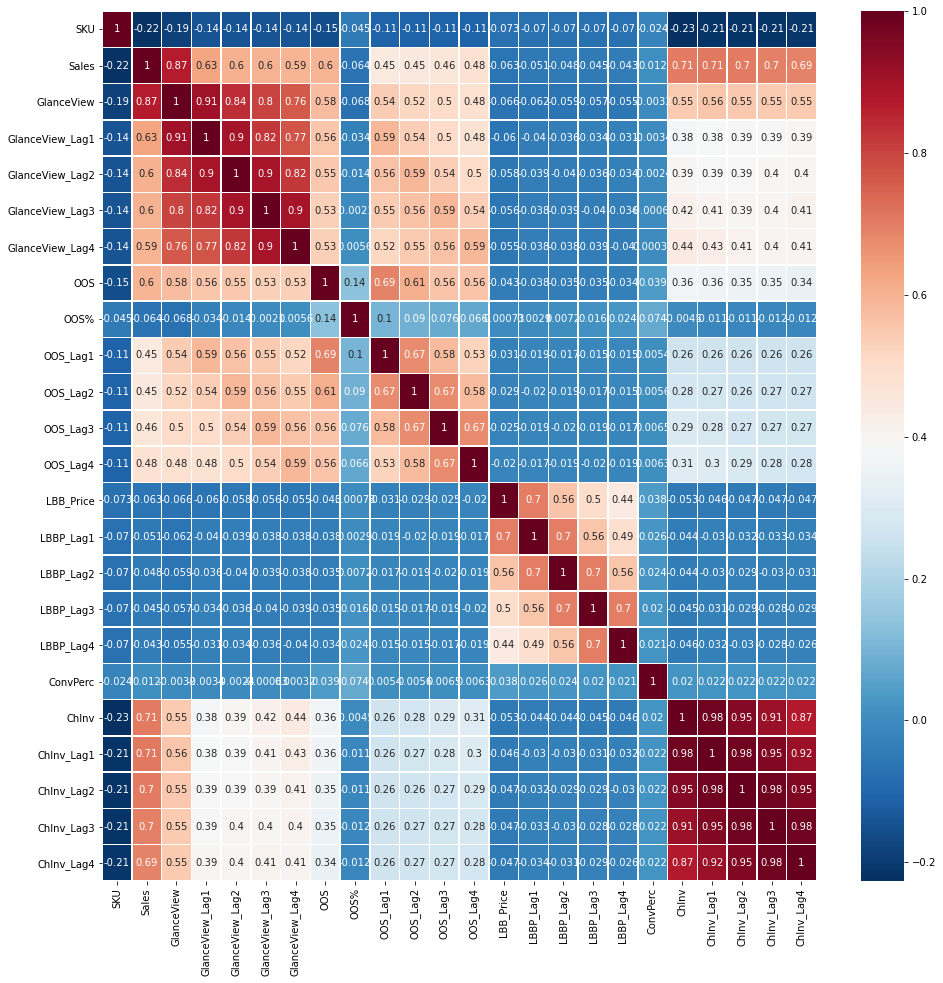

In [38]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,16))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

# SubCategory Sales Rank, Shipped COGS, Units Data

In [39]:
AmzData = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","COGS_Sales_Rank_Data.csv"))
AmzData = AmzData.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU"})
AmzData.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'Shipped COGS',
       'Shipped Units', 'Subcategory (Sales Rank)'],
      dtype='object')

In [40]:
Data1 = pd.merge(Data1, AmzData[['SKU','Time','Shipped COGS','Shipped Units','Subcategory (Sales Rank)']], how='left', on=['SKU','Time'])


In [41]:
pearson = Data1.corr(method='pearson')


<AxesSubplot:>

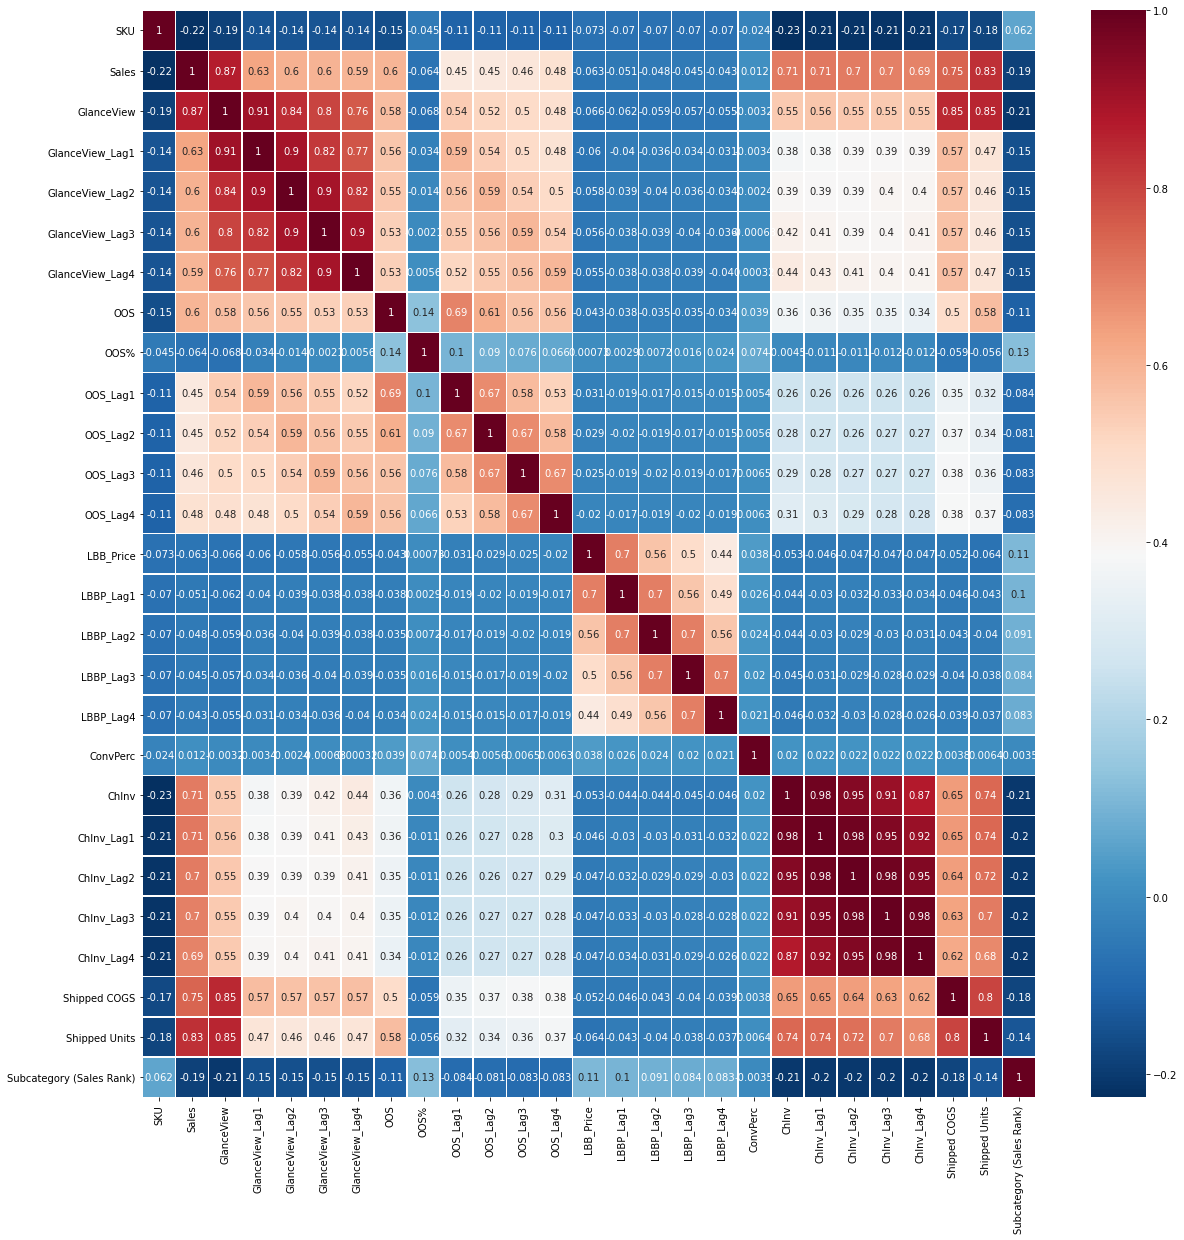

In [42]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

# Amazon Data

In [43]:
AmazonData = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","AmazonData.csv"))
AmazonData = AmazonData.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU"})
AmazonData.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'Customer Returns',
       'Free Replacements', 'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV'],
      dtype='object')

In [44]:
AmazonData.drop(['Version.[Version Name]'], axis=1)
Data1 = pd.merge(Data1,AmazonData , how='left', on=['SKU','Time'])
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceView_Lag1',
       'GlanceView_Lag2', 'GlanceView_Lag3', 'GlanceView_Lag4', 'OOS', 'OOS%',
       'OOS_Lag1', 'OOS_Lag2', 'OOS_Lag3', 'OOS_Lag4', 'LBB_Price',
       'LBBP_Lag1', 'LBBP_Lag2', 'LBBP_Lag3', 'LBBP_Lag4', 'ConvPerc', 'ChInv',
       'ChInv_Lag1', 'ChInv_Lag2', 'ChInv_Lag3', 'ChInv_Lag4', 'Shipped COGS',
       'Shipped Units', 'Subcategory (Sales Rank)', 'Version.[Version Name]',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV'],
      dtype='object')

In [45]:
pearson = Data1.corr(method='pearson')


<AxesSubplot:>

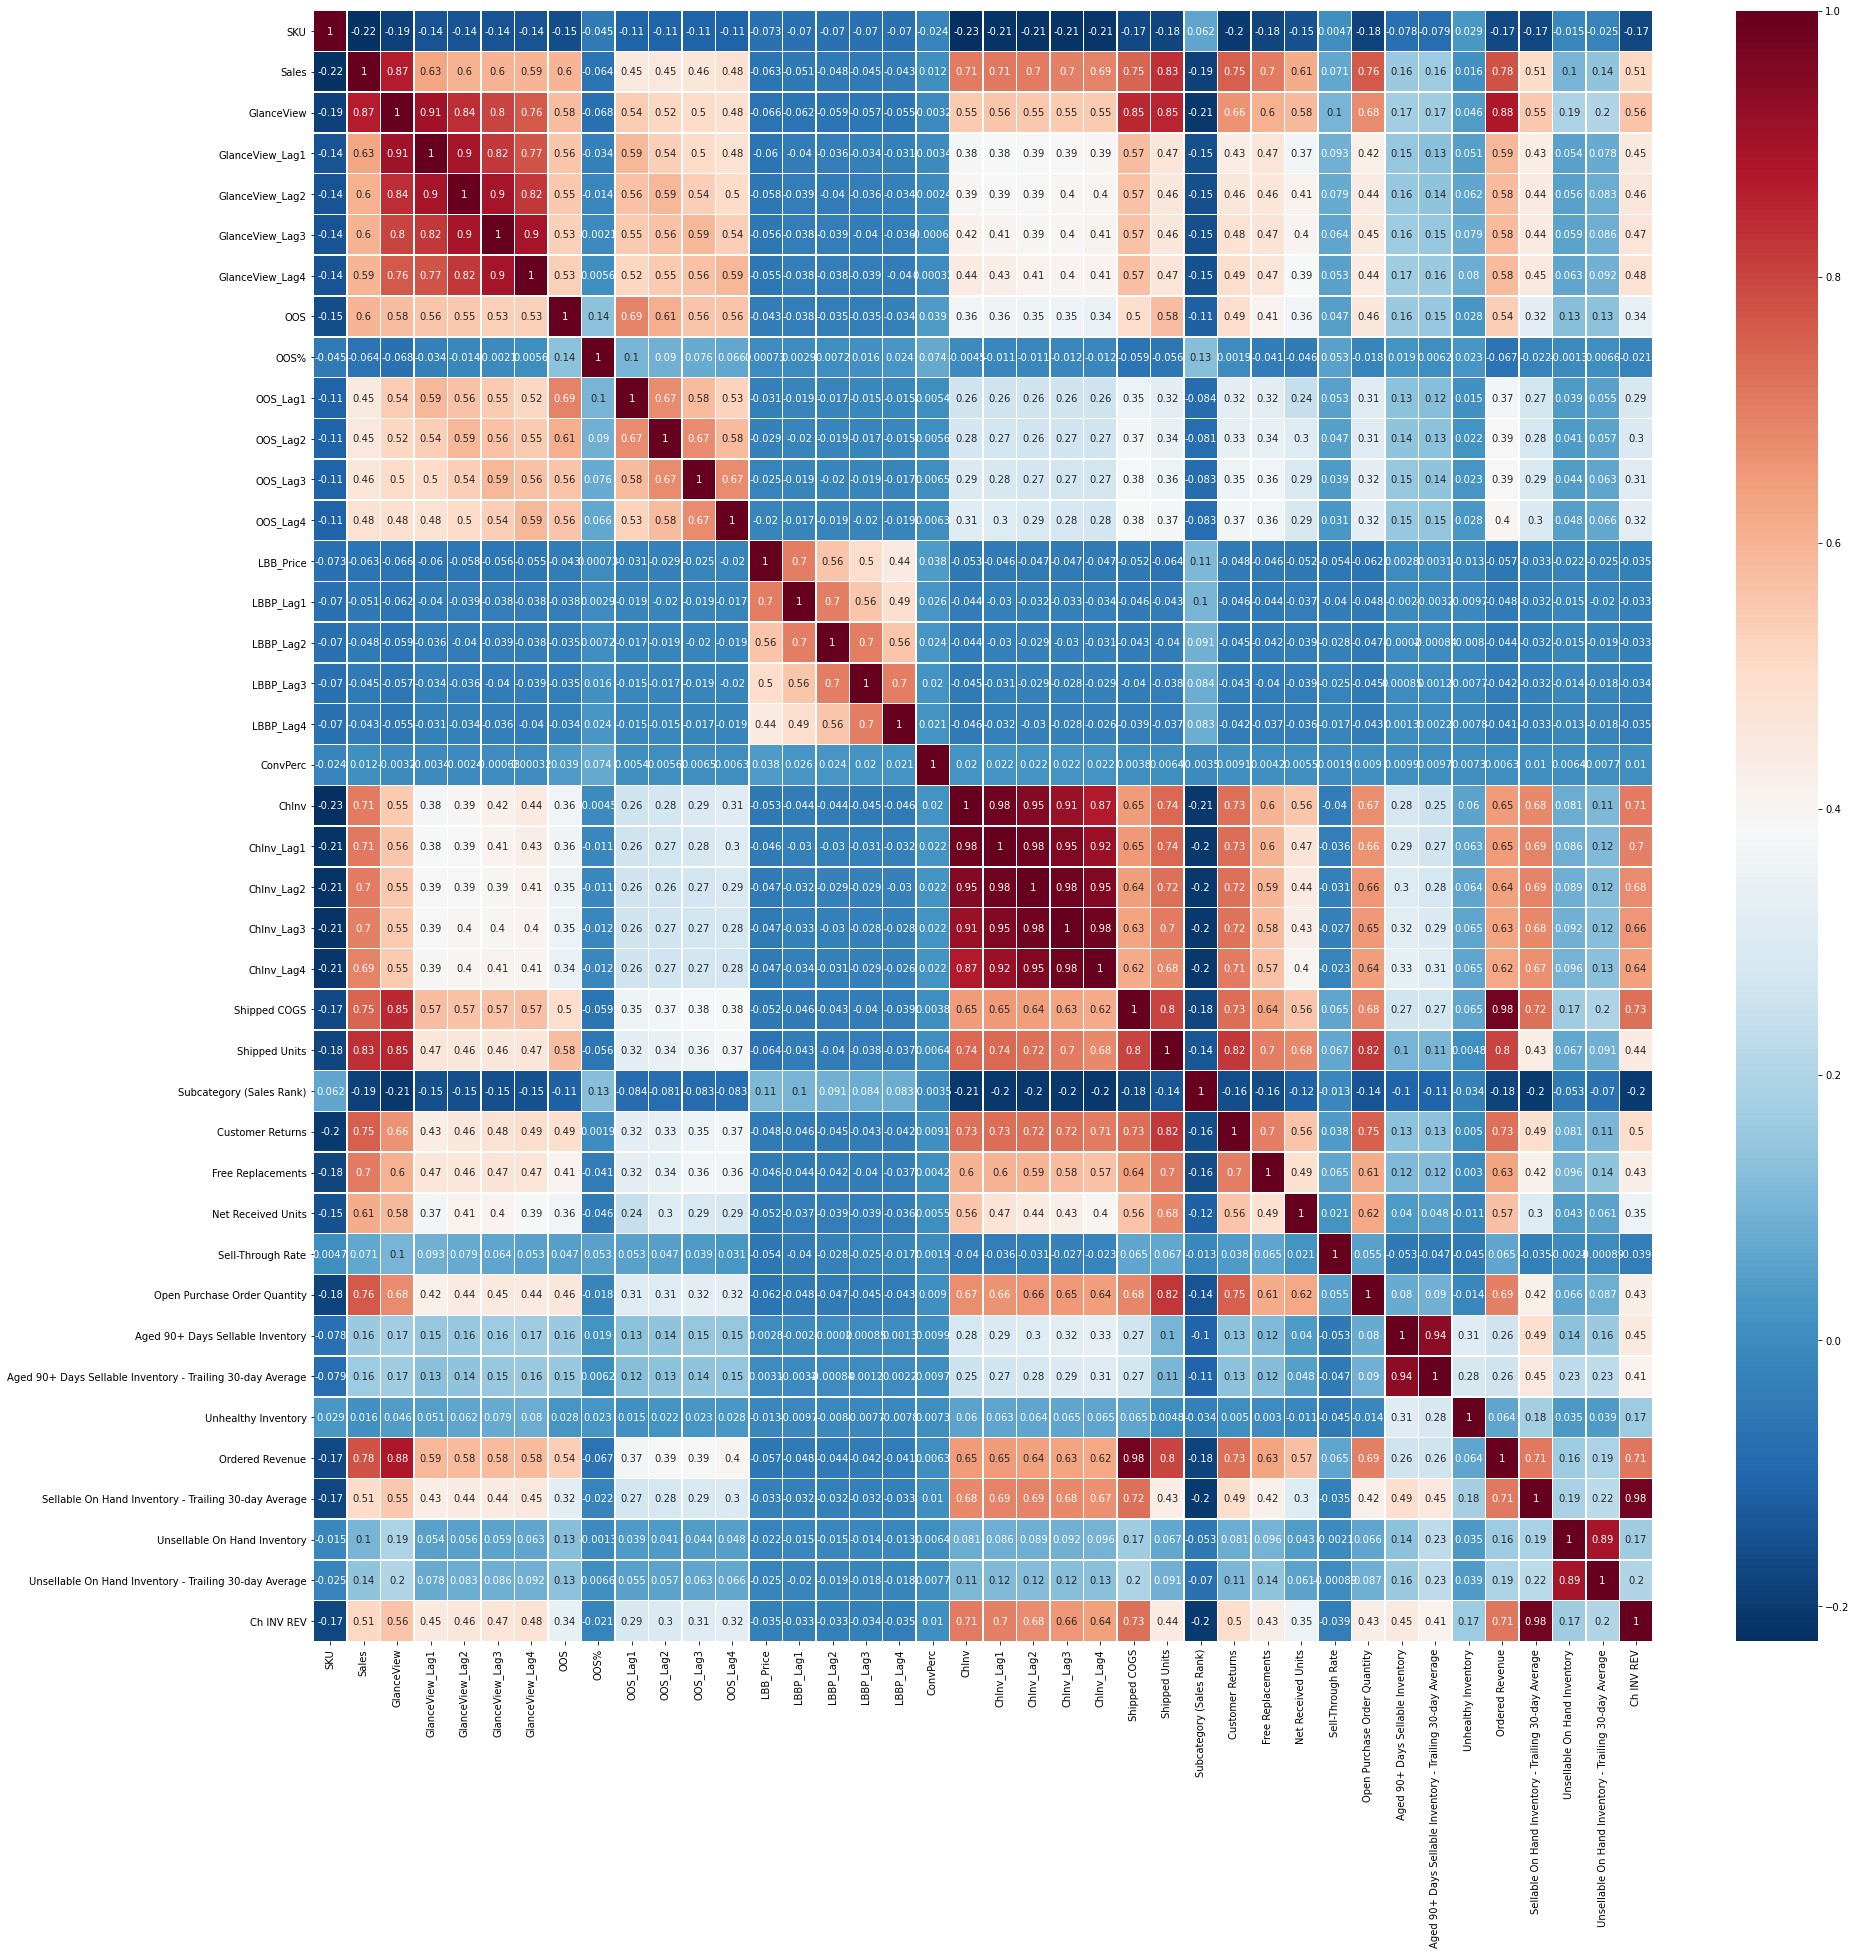

In [46]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

In [132]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [124]:
pearson.to_csv("Sellout_Correlation_Analysis.csv")

In [125]:
pearson

SKU     Sales  \
SKU                                                 1.000000 -0.217508   
Sales                                              -0.217508  1.000000   
GlanceView                                         -0.187799  0.868879   
GlanceView_Lag1                                    -0.140606  0.631111   
GlanceView_Lag2                                    -0.140606  0.603559   
GlanceView_Lag3                                    -0.140606  0.597858   
GlanceView_Lag4                                    -0.140606  0.593198   
OOS                                                -0.154880  0.595585   
OOS%                                               -0.045117 -0.064297   
OOS_Lag1                                           -0.110798  0.448493   
OOS_Lag2                                           -0.110798  0.449718   
OOS_Lag3                                           -0.110798  0.461656   
OOS_Lag4                                           -0.110798  0.480687   
LBB_Price                                          -0.072761 -0.063174   
LBBP_Lag1                                          -0.070160 -0.050638   
LBBP_Lag2                                          -0.070160 -0.047547   
LBBP_Lag3                                          -0.070160 -0.044807   
LBBP_Lag4                                          -0.070160 -0.042768   
ConvPerc                                           -0.023956  0.011541   
ChInv                                              -0.226288  0.707493   
ChInv_Lag1                                         -0.214173  0.711581   
ChInv_Lag2                                         -0.212873  0.704480   
ChInv_Lag3                                         -0.211958  0.697342   
ChInv_Lag4                                         -0.211691  0.691752   
Shipped COGS                                       -0.167239  0.745666   
Shipped Units                                      -0.176097  0.833170   
Subcategory (Sales Rank)                            0.062175 -0.186570   
Customer Returns                                   -0.199453  0.752361   
Free Replacements                                  -0.175934  0.703706   
Net Received Units                                 -0.145157  0.612634   
Sell-Through Rate                                   0.004738  0.070610   
Open Purchase Order Quantity                       -0.180991  0.761408   
Aged 90+ Days Sellable Inventory                   -0.077574  0.159012   
Aged 90+ Days Sellable Inventory - Trailing 30-... -0.078686  0.162318   
Unhealthy Inventory                                 0.029207  0.016421   
Ordered Revenue                                    -0.167416  0.779231   
Sellable On Hand Inventory - Trailing 30-day Av... -0.172832  0.506098   
Unsellable On Hand Inventory                       -0.015076  0.104087   
Unsellable On Hand Inventory - Trailing 30-day ... -0.024515  0.141152   
Ch INV REV                                         -0.172535  0.514256   

                                                    GlanceView  \
SKU                                                  -0.187799   
Sales                                                 0.868879   
GlanceView                                            1.000000   
GlanceView_Lag1                                       0.906504   
GlanceView_Lag2                                       0.838603   
GlanceView_Lag3                                       0.799177   
GlanceView_Lag4                                       0.762434   
OOS                                                   0.575695   
OOS%                                                 -0.068272   
OOS_Lag1                                              0.540161   
OOS_Lag2                                              0.519965   
OOS_Lag3                                              0.502460   
OOS_Lag4                                              0.483381   
LBB_Price                                            -0.066172   
LBBP_Lag1                       

# Customer Promotion

In [50]:
CustomerPromo = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","CustomerPromo.csv"))
CustomerPromo = CustomerPromo.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Price Discount% Day":"CustomerPromo"})
CustomerPromo.columns

Index(['Promotion.[Promotion ID]', 'Version.[Version Name]', 'Time', 'SKU',
       'CustomerPromo'],
      dtype='object')

In [51]:
CustomerPromo.drop(['Version.[Version Name]'], axis=1)
Data1 = pd.merge(Data1,CustomerPromo , how='left', on=['SKU','Time'])
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceView_Lag1',
       'GlanceView_Lag2', 'GlanceView_Lag3', 'GlanceView_Lag4', 'OOS', 'OOS%',
       'OOS_Lag1', 'OOS_Lag2', 'OOS_Lag3', 'OOS_Lag4', 'LBB_Price',
       'LBBP_Lag1', 'LBBP_Lag2', 'LBBP_Lag3', 'LBBP_Lag4', 'ConvPerc', 'ChInv',
       'ChInv_Lag1', 'ChInv_Lag2', 'ChInv_Lag3', 'ChInv_Lag4', 'Shipped COGS',
       'Shipped Units', 'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Version.[Version Name]_y',
       

In [52]:
pearson = Data1.corr(method='pearson')


In [54]:
pearson.to_csv("Sellout_Correlation_Analysis_CustomerPromo.csv")

<AxesSubplot:>

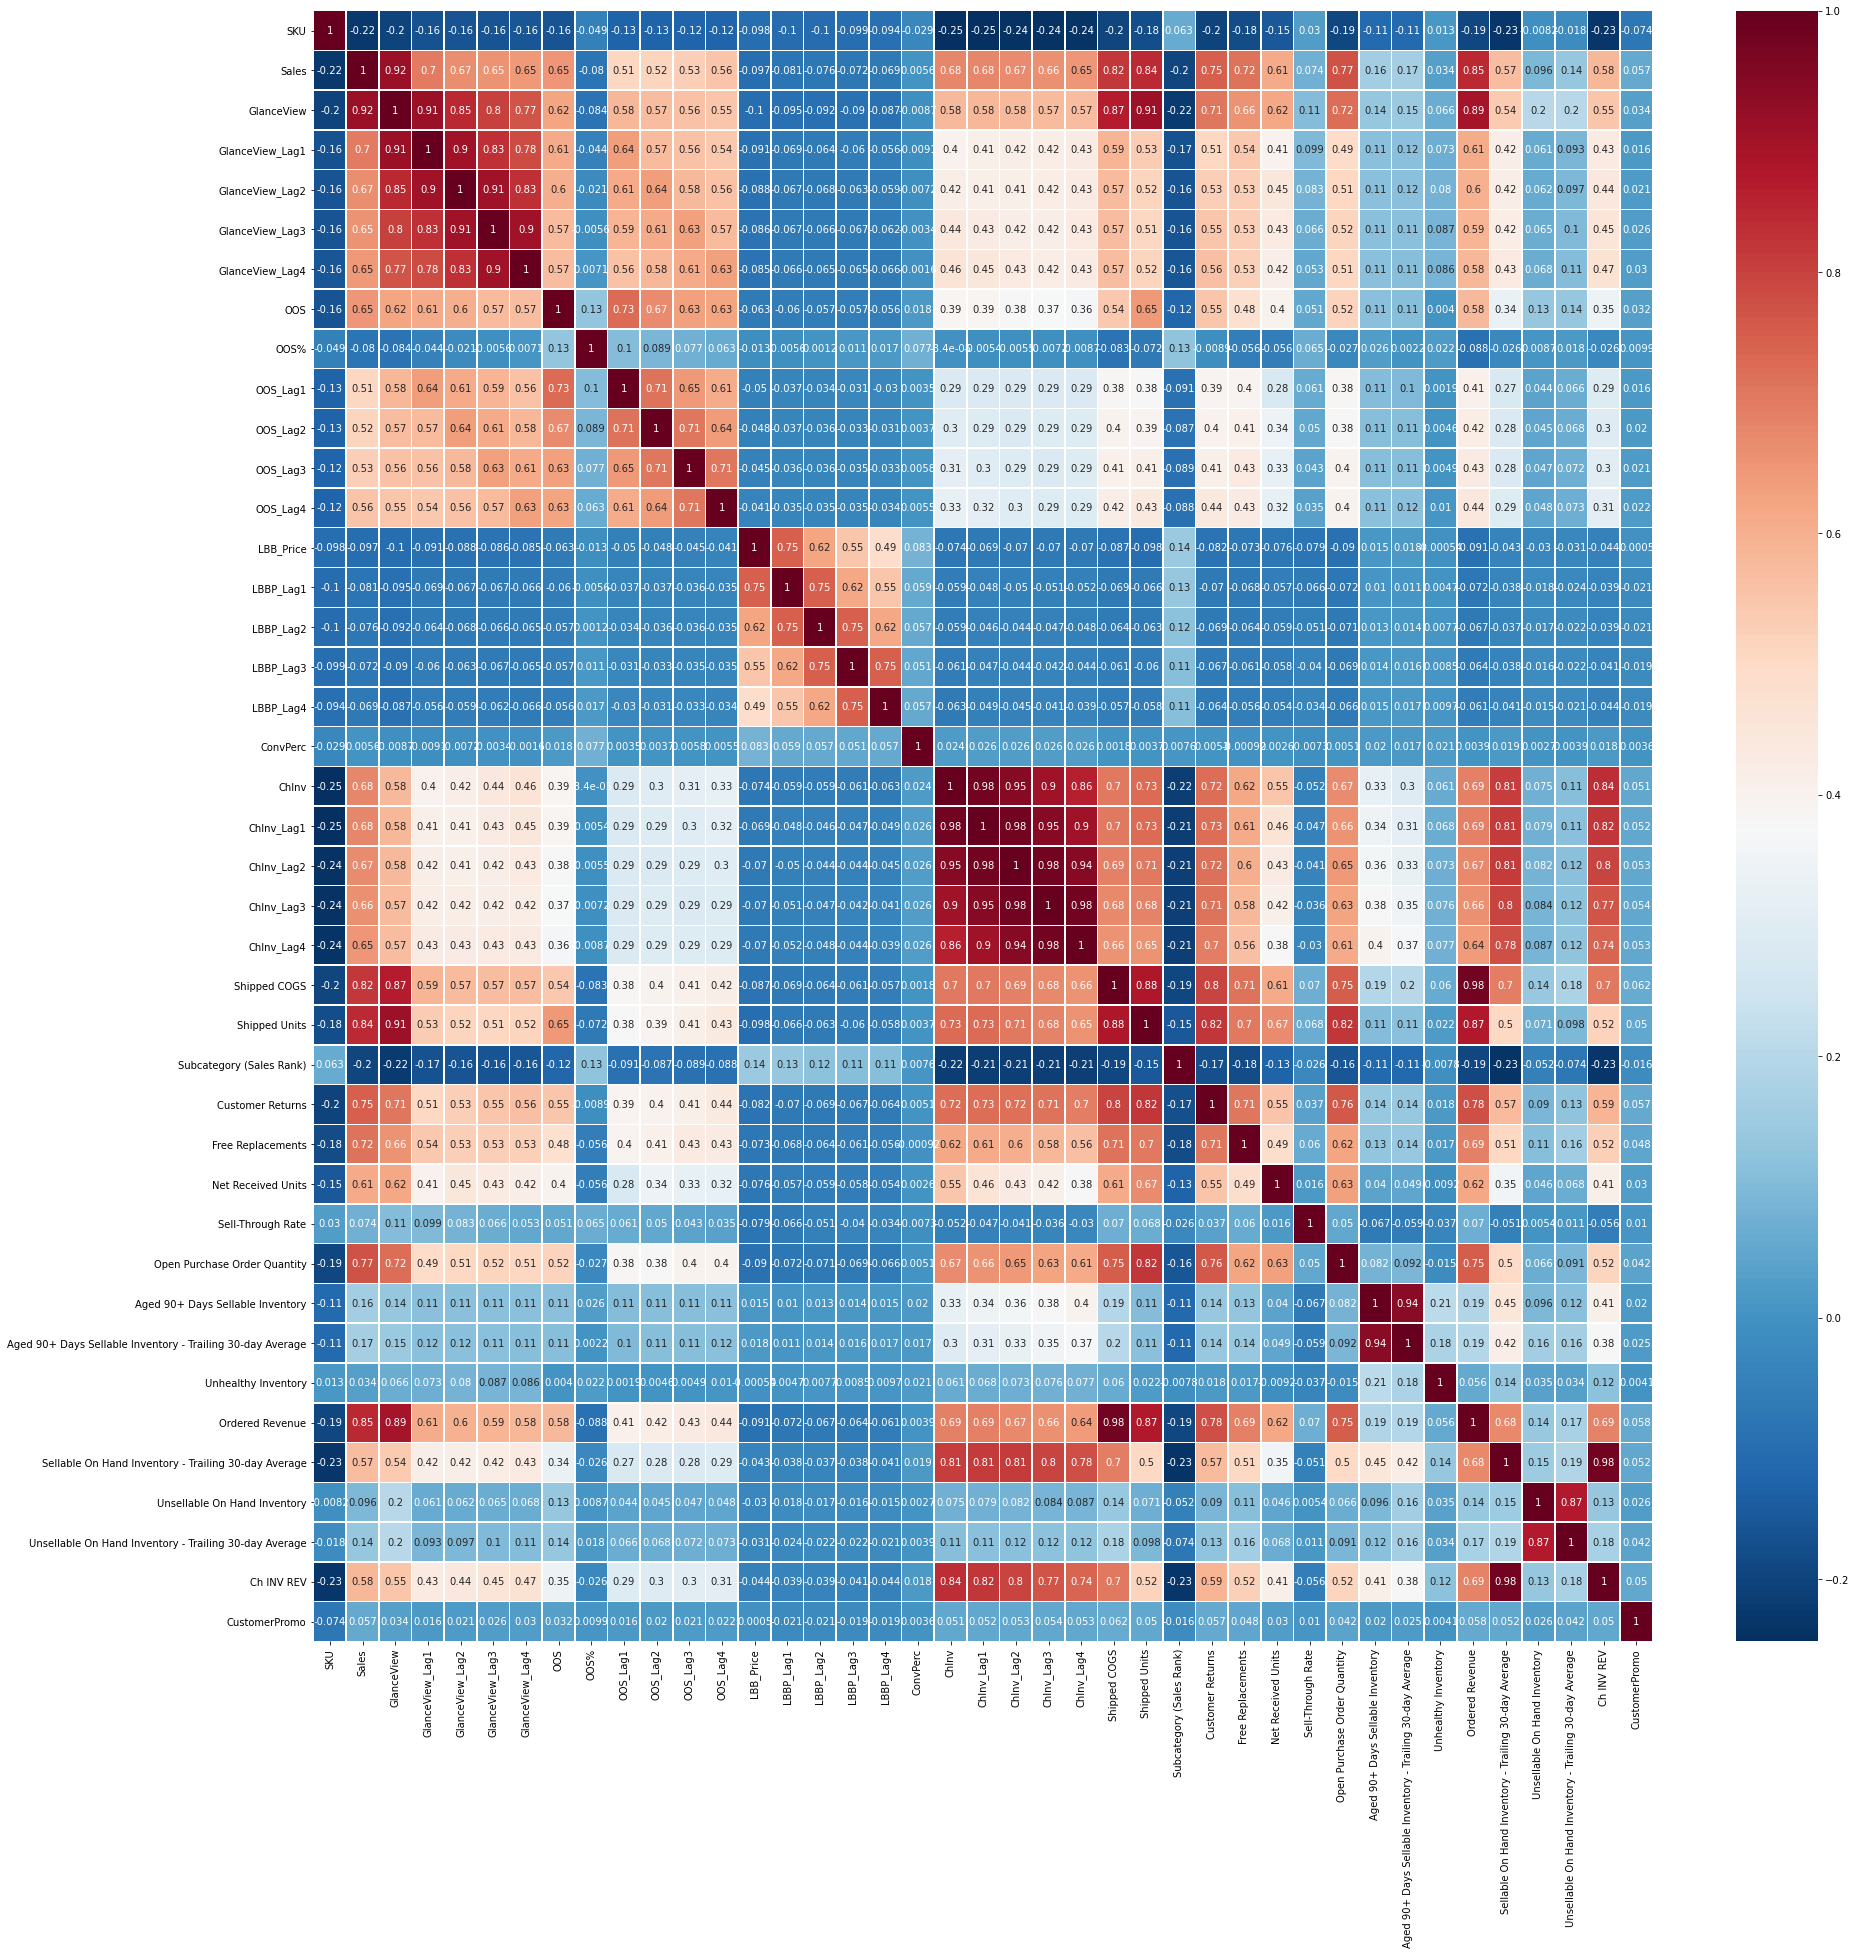

In [53]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

# ILI Activity Level

In [57]:
ILIData = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","ILIActivityData.csv"))
ILIData = ILIData.rename(columns={"Time.[Week]": "Time","ILI Activity Level PW":"ILIActivity"})
ILIData.columns

Index(['Version.[Version Name]', 'Time', 'ILIActivity'], dtype='object')

In [59]:
ILIData.drop(['Version.[Version Name]'], axis=1)
Data1 = pd.merge(Data1,ILIData , how='left', on=['Time'])
Data1.columns

Index(['SKU', 'Time', 'Date', 'Sales', 'GlanceView', 'GlanceView_Lag1',
       'GlanceView_Lag2', 'GlanceView_Lag3', 'GlanceView_Lag4', 'OOS', 'OOS%',
       'OOS_Lag1', 'OOS_Lag2', 'OOS_Lag3', 'OOS_Lag4', 'LBB_Price',
       'LBBP_Lag1', 'LBBP_Lag2', 'LBBP_Lag3', 'LBBP_Lag4', 'ConvPerc', 'ChInv',
       'ChInv_Lag1', 'ChInv_Lag2', 'ChInv_Lag3', 'ChInv_Lag4', 'Shipped COGS',
       'Shipped Units', 'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Version.[Version Name]_y', 'Custom

In [60]:
pearson = Data1.corr(method='pearson')


<AxesSubplot:>

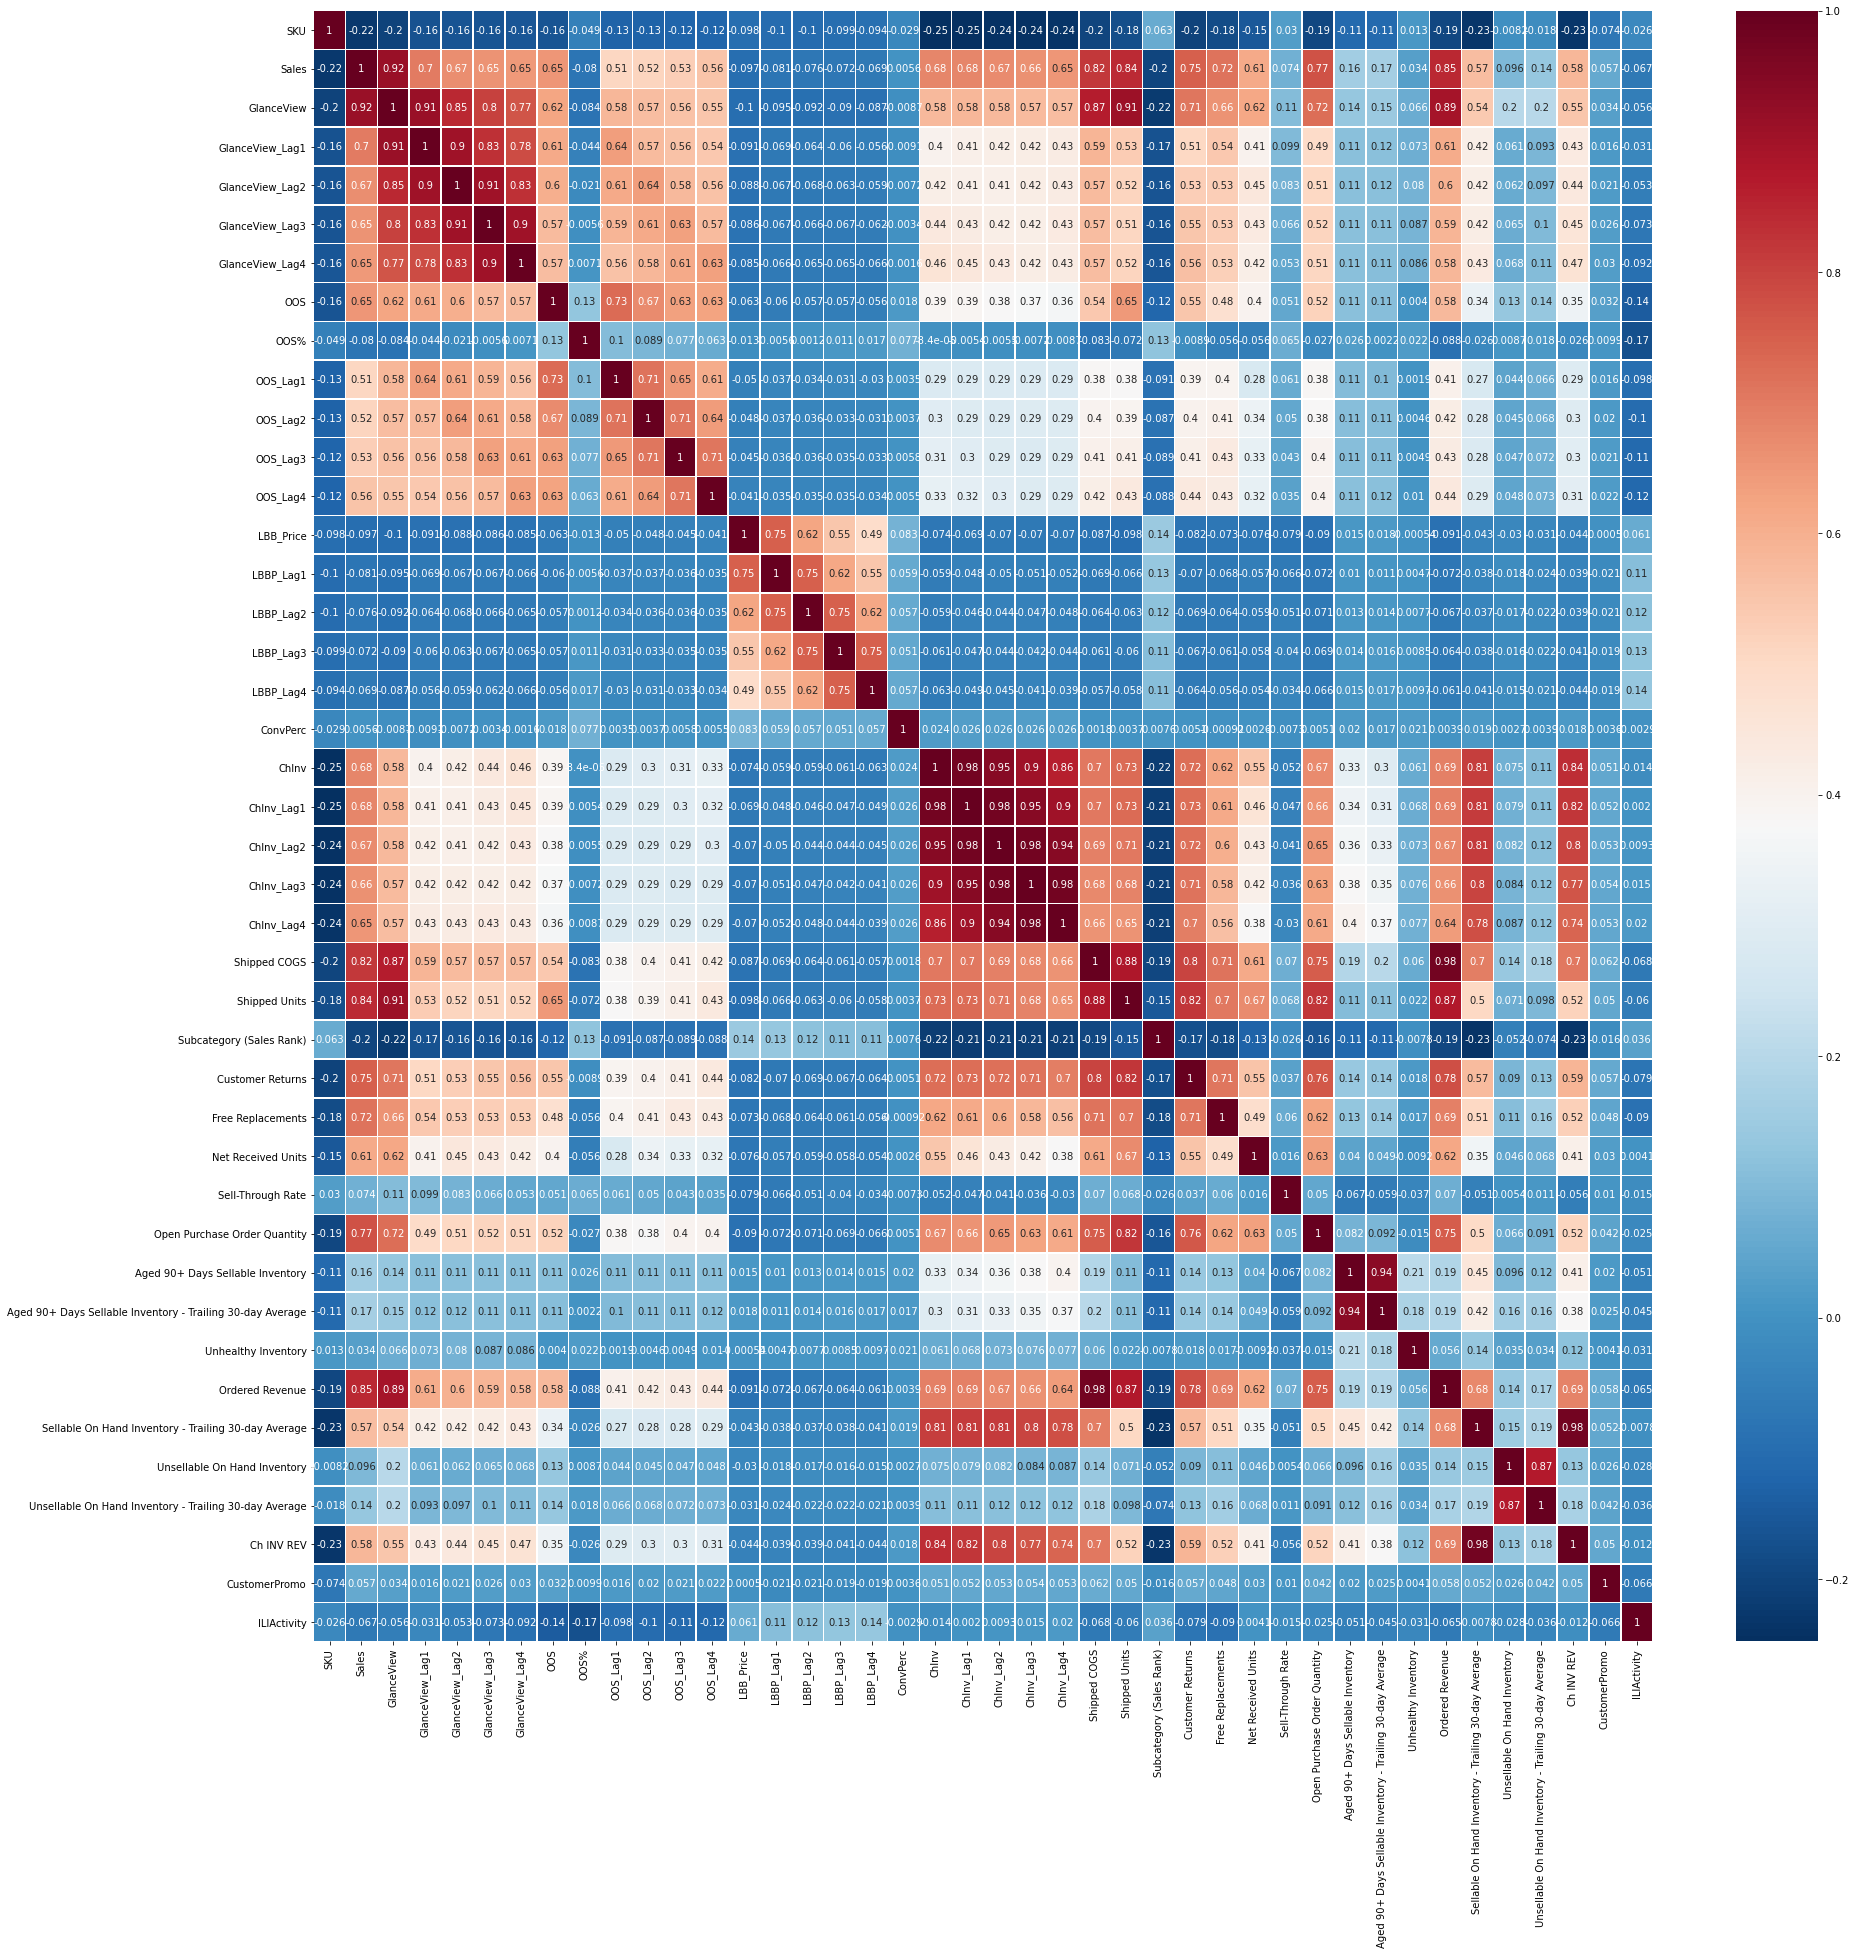

In [61]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

In [62]:
pearson.to_csv("Sellout_Correlation_Analysis_CustomerPromo_withILIActivity.csv")